In [1]:
cpx = '../out/biogrid.physical.txt'

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [3]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
it = set()
for l in open(cpx):
    g1, g2 = l.rstrip().split()
    it.add(tuple(sorted((g1, g2))))

Optimization terminated successfully.
         Current function value: 0.544871
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623018
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630697
         Iterations 5


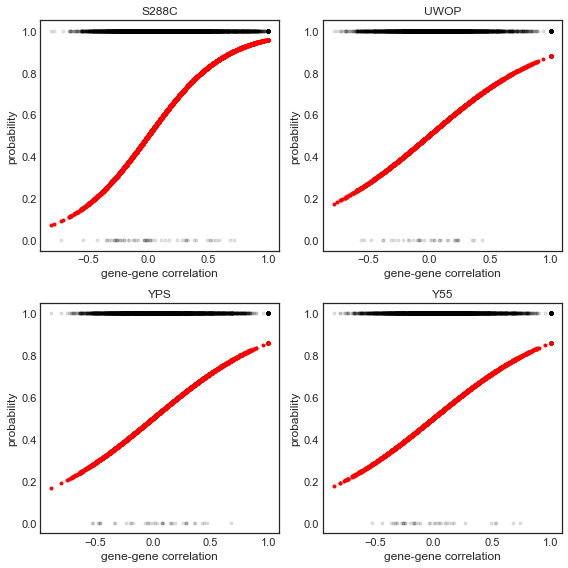

In [9]:
plt.figure(figsize=(8, 8))

for i, s in enumerate(['S288C', 'UWOP',
                       'YPS', 'Y55']):
    plt.subplot(2, 2, i+1)
    
    m = pd.read_table('../out/%s.tsv' % s, index_col=0)
    m.index.name = s
    m = m.T
    m.index.name = s
    m = m.T
    genes = set(m.index).intersection(m.columns)
    m = m.loc[genes, genes].unstack()
    
    x = m.loc[sorted(it)].dropna()
    y = m.sample(int(x.shape[0] / 100))

    endog = np.concatenate((np.ones(x.shape[0]),
                            np.zeros(y.shape[0])))
    exog = np.concatenate((x.values,
                           y))
    md = sm.Logit(endog, exog)
    res = md.fit()

    plt.plot(x,
             np.ones(x.shape[0]),
             'k.',
             alpha=0.1)
    plt.plot(y,
             np.zeros(y.shape[0]),
             'k.',
             alpha=0.1)
    plt.plot(exog,
             md.predict(res.params),
             'r.')
    
    plt.xlabel('gene-gene correlation')
    plt.ylabel('probability')
    
    plt.title(s)
    
plt.tight_layout();

<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>